In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [2]:
# Load the data
data = pd.read_csv("202305-citibike-tripdata_1.csv")

# Preview the data
data.head()


C:\Users\yaako\AppData\Local\Temp\ipykernel_22604\4237272285.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("202305-citibike-tripdata_1.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,176B188F3289F37B,classic_bike,2023-05-23 19:22:53,2023-05-23 19:35:23,E 50 St & Park Ave,6659.10,E 74 St & 1 Ave,6953.08,40.757306,-73.974518,40.768974,-73.954823,member
1,BB6957A02501C686,classic_bike,2023-05-27 08:49:55,2023-05-27 08:57:42,Flatbush Ave & Ocean Ave,3704.04,Grand Army Plaza & Plaza St West,4010.15,40.663657,-73.963014,40.672968,-73.970880,member
2,C67567E1DAFB9F2C,classic_bike,2023-05-12 20:19:58,2023-05-12 20:36:07,Flatbush Ave & Ocean Ave,3704.04,3 St & 7 Ave,3905.15,40.663657,-73.963014,40.670384,-73.978397,member
3,89DDFCEAE05D043A,electric_bike,2023-05-03 07:59:13,2023-05-03 08:07:04,Flatbush Ave & Ocean Ave,3704.04,3 St & 7 Ave,3905.15,40.663657,-73.963014,40.670384,-73.978397,member
4,63B1D5A7A2316252,classic_bike,2023-05-13 10:23:52,2023-05-13 10:47:17,Flatbush Ave & Ocean Ave,3704.04,Grand Army Plaza & Plaza St West,4010.15,40.663657,-73.963014,40.672968,-73.970880,member


In [3]:
# Display basic information about the datasetggg
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1000000 non-null  object 
 1   rideable_type       1000000 non-null  object 
 2   started_at          1000000 non-null  object 
 3   ended_at            1000000 non-null  object 
 4   start_station_name  999430 non-null   object 
 5   start_station_id    999430 non-null   object 
 6   end_station_name    991505 non-null   object 
 7   end_station_id      991505 non-null   object 
 8   start_lat           1000000 non-null  float64
 9   start_lng           1000000 non-null  float64
 10  end_lat             996991 non-null   float64
 11  end_lng             996991 non-null   float64
 12  member_casual       1000000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 99.2+ MB


In [9]:
# Drop rows with missing values
data = data.dropna()

# Convert datetime columns to datetime type
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

# Create additional time-related columns
data['start_hour'] = data['started_at'].dt.hour
data['day_of_week'] = data['started_at'].dt.dayofweek
data['start_month'] = data['started_at'].dt.month_name()
data['date'] = data['started_at'].dt.date

data['trip_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

In [10]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_hour,day_of_week,start_month,trip_duration,date
0,176B188F3289F37B,classic_bike,2023-05-23 19:22:53,2023-05-23 19:35:23,E 50 St & Park Ave,6659.10,E 74 St & 1 Ave,6953.08,40.757306,-73.974518,40.768974,-73.954823,member,19,1,May,12.500000,2023-05-23
1,BB6957A02501C686,classic_bike,2023-05-27 08:49:55,2023-05-27 08:57:42,Flatbush Ave & Ocean Ave,3704.04,Grand Army Plaza & Plaza St West,4010.15,40.663657,-73.963014,40.672968,-73.970880,member,8,5,May,7.783333,2023-05-27
2,C67567E1DAFB9F2C,classic_bike,2023-05-12 20:19:58,2023-05-12 20:36:07,Flatbush Ave & Ocean Ave,3704.04,3 St & 7 Ave,3905.15,40.663657,-73.963014,40.670384,-73.978397,member,20,4,May,16.150000,2023-05-12
3,89DDFCEAE05D043A,electric_bike,2023-05-03 07:59:13,2023-05-03 08:07:04,Flatbush Ave & Ocean Ave,3704.04,3 St & 7 Ave,3905.15,40.663657,-73.963014,40.670384,-73.978397,member,7,2,May,7.850000,2023-05-03
4,63B1D5A7A2316252,classic_bike,2023-05-13 10:23:52,2023-05-13 10:47:17,Flatbush Ave & Ocean Ave,3704.04,Grand Army Plaza & Plaza St West,4010.15,40.663657,-73.963014,40.672968,-73.970880,member,10,5,May,23.416667,2023-05-13


# Data Analysis

### What is the average trip duration?

In [11]:
# Calculate the average trip duration
average_trip_duration = data['trip_duration'].mean().round(1)

# Print the formatted message
print(f"The average trip duration is {average_trip_duration} minutes.")

The average trip duration is 14.5 minutes.


### Does the average number of trips vary by day?

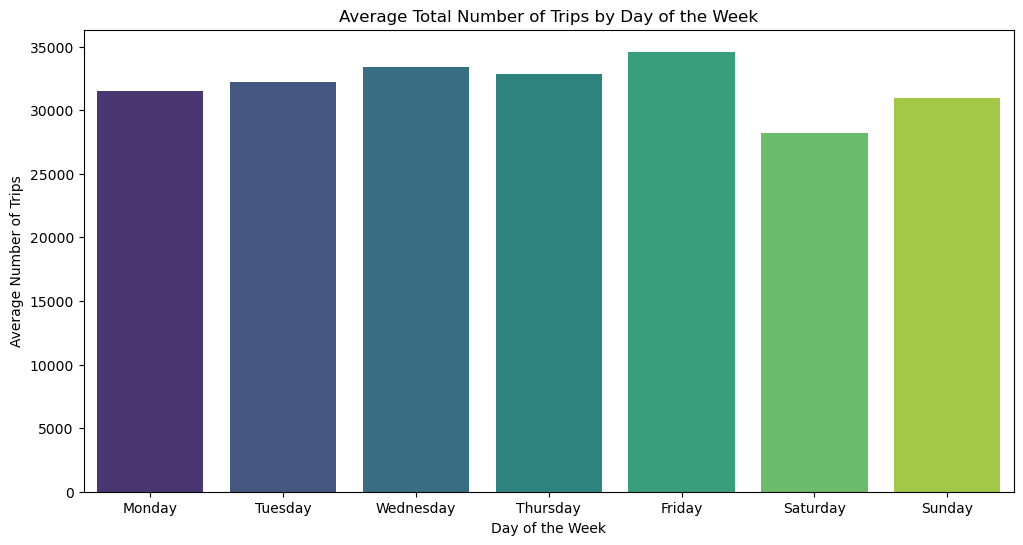

In [12]:
# Calculate the number of trips per day
daily_trips = data.groupby(['day_of_week', 'date']).size().reset_index(name='trips')

# Calculate the average number of trips for each day of the week
avg_daily_trips = daily_trips.groupby('day_of_week')['trips'].mean()

# Map day of week numbers to names
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_daily_trips.index = [days_of_week[day] for day in avg_daily_trips.index]

# Plot the average total number of trips by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_daily_trips.index, y=avg_daily_trips.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Trips')
plt.title('Average Total Number of Trips by Day of the Week')
plt.show()

As you can see above, while there is a slight dropoff in number of trips on the weekends, it remains pretty consistent around the 30,000 trips per day mark

### What about time of day? What times are the most active?

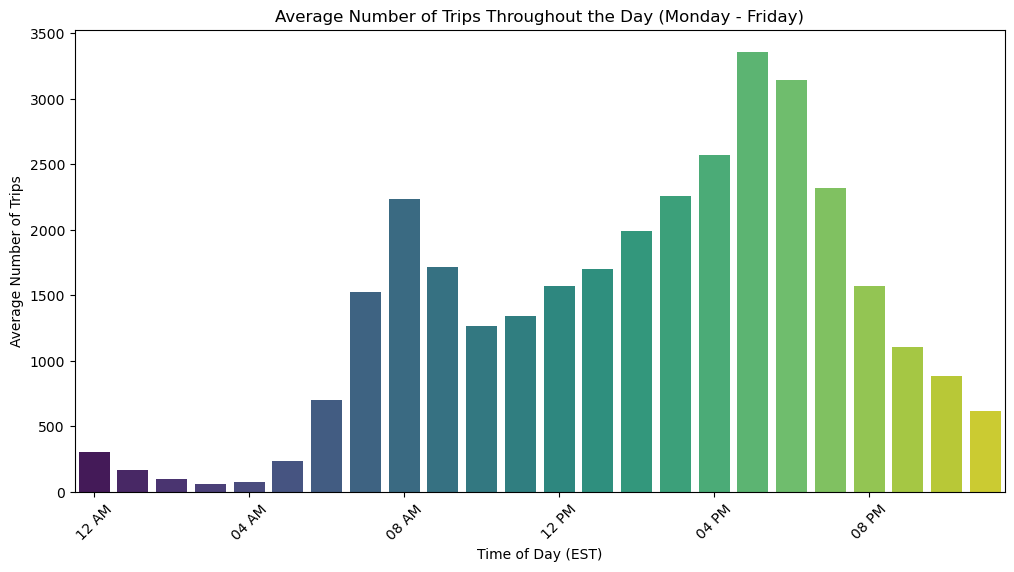

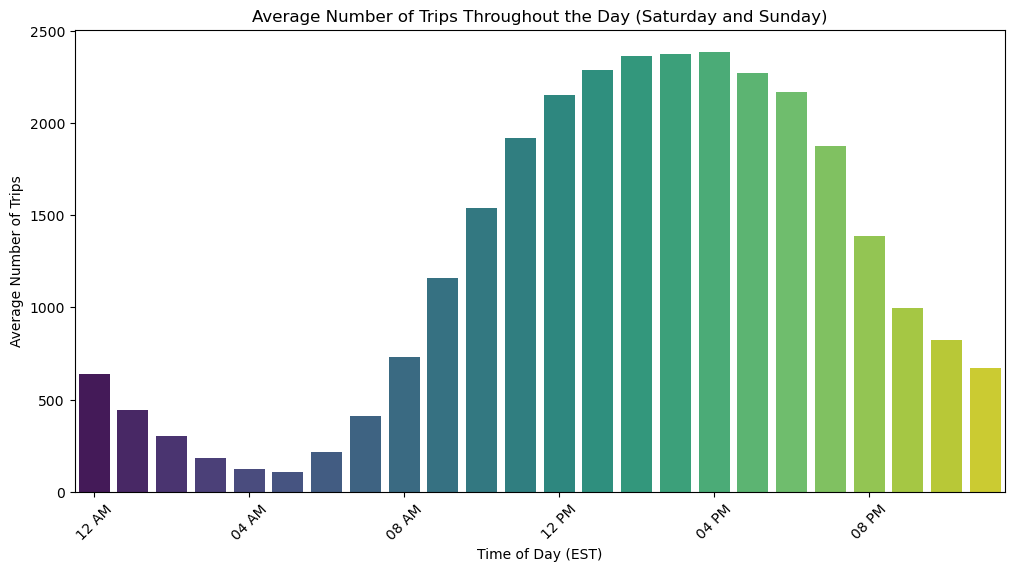

In [13]:
# Extract hour and day of week from the start time
data['date'] = data['started_at'].dt.date

# Filter data for weekdays (0=Monday, 1=Tuesday, ..., 4=Friday)
weekday_data = data[data['day_of_week'] < 5]

# Filter data for weekends (5=Saturday, 6=Sunday)
weekend_data = data[data['day_of_week'] >= 5]

# Calculate the number of trips per hour per day for weekdays and weekends
weekday_hourly_trips = weekday_data.groupby(['date', 'start_hour']).size().reset_index(name='trips')
weekend_hourly_trips = weekend_data.groupby(['date', 'start_hour']).size().reset_index(name='trips')

# Calculate the average number of trips per hour for weekdays and weekends
weekday_avg_trips = weekday_hourly_trips.groupby('start_hour')['trips'].mean()
weekend_avg_trips = weekend_hourly_trips.groupby('start_hour')['trips'].mean()

# Create time labels in EST for 4-hour increments
time_labels_4h = [(datetime(2000, 1, 1, h) + timedelta(hours=0)).strftime('%I %p') for h in range(0, 24, 4)]

# Plot the average number of trips by hour for weekdays
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_avg_trips.index, y=weekday_avg_trips.values, palette='viridis')
plt.xticks(ticks=range(0, 24, 4), labels=time_labels_4h, rotation=45)
plt.xlabel('Time of Day (EST)')
plt.ylabel('Average Number of Trips')
plt.title('Average Number of Trips Throughout the Day (Monday - Friday)')
plt.show()

# Plot the average number of trips by hour for weekends
plt.figure(figsize=(12, 6))
sns.barplot(x=weekend_avg_trips.index, y=weekend_avg_trips.values, palette='viridis')
plt.xticks(ticks=range(0, 24, 4), labels=time_labels_4h, rotation=45)
plt.xlabel('Time of Day (EST)')
plt.ylabel('Average Number of Trips')
plt.title('Average Number of Trips Throughout the Day (Saturday and Sunday)')
plt.show()

#### Some takeaways:

There is considerably more bike traffic during the weekdays, with the number of active trips peaking around 5 PM. 

In addition to having less bikes rented overall on the weekends, the activity throughout the day more closely follows a normal distribution in contrast to the rush hour double peak on weekdays





#### What are the most popular routes taken?

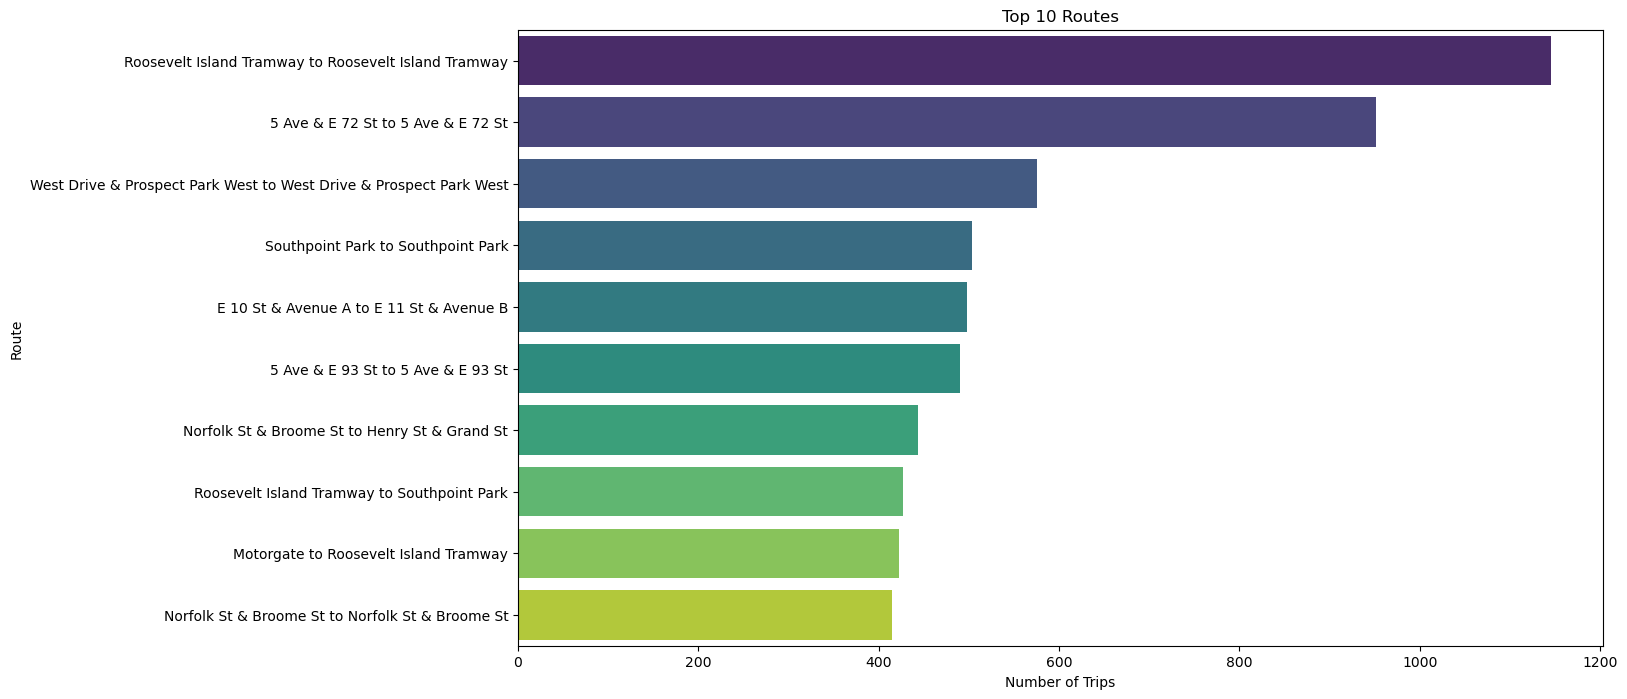

In [16]:
# Create a new column for route (start station to end station)
data['route'] = data['start_station_name'] + " to " + data['end_station_name']

# Top 10 routes
top_routes = data['route'].value_counts().head(10)

# Plot top 10 routes
plt.figure(figsize=(14, 8))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')
plt.title('Top 10 Routes')
plt.xlabel('Number of Trips')
plt.ylabel('Route')
plt.show()

#### How many trips are taken by CitiBike members vs single use riders?

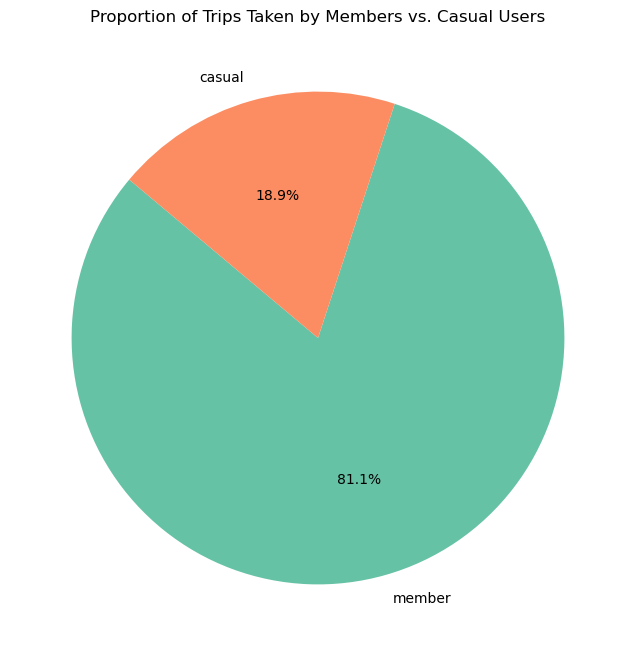

In [19]:

# Calculate the number of trips for each user type
user_type_counts = data['member_casual'].value_counts()

# Plot the proportion of trips taken by each user type as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Proportion of Trips Taken by Members vs. Casual Users')
plt.show()